In [2]:
import statsmodels

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\5 data\\2023-2024-fixed.csv")
dt = data[[
    'date.range',
    'passenger'
]]
dt.head()
dt.shape

(639, 2)

Jumlah data latih: 578
Jumlah data uji: 61


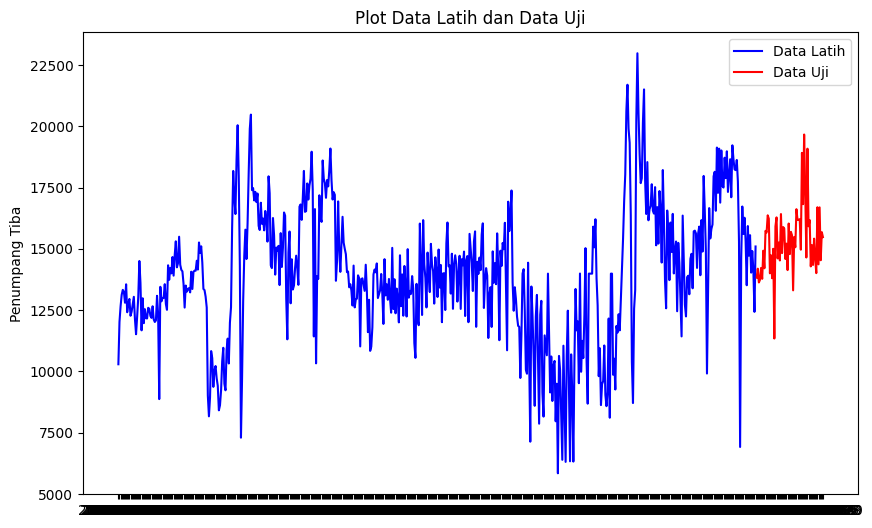

In [132]:
train_data = dt.iloc[:578]
test_data = dt.iloc[578:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['date.range'], train_data['passenger'], label='Data Latih', color='blue')
plt.plot(test_data['date.range'], test_data['passenger'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Penumpang Tiba')
plt.legend()
plt.show()

In [168]:
from statsmodels.tsa.seasonal import MSTL, STL
from statsmodels.tsa.seasonal import DecomposeResult
mstl = MSTL(train_data['passenger'],
            periods=[7],
            lmbda="auto",
            stl_kwargs= {
                'robust':True
            })

In [169]:
res = mstl.fit()

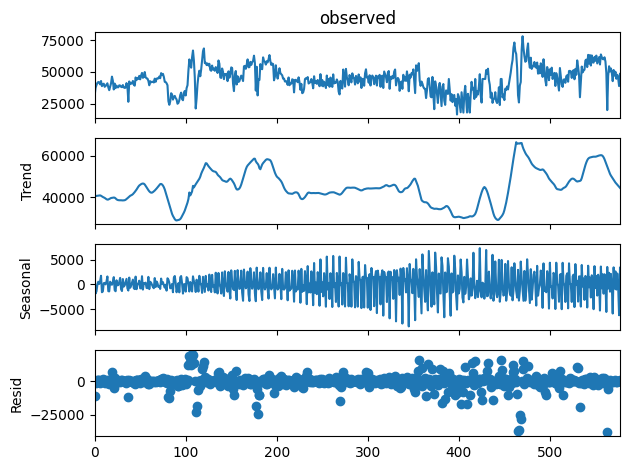

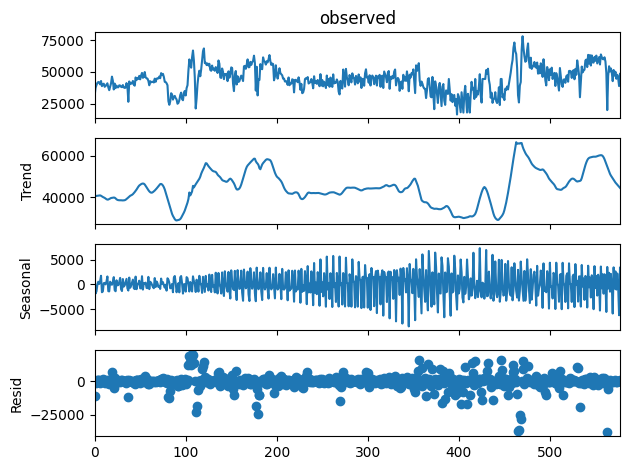

In [170]:
res.plot()

In [121]:
pd.DataFrame(res.seasonal).to_csv("D:\\IPB\\5\\MPDW\\project\\8 decompose\\seasonal_train.csv")

In [122]:
pd.DataFrame(res.trend).to_csv("D:\\IPB\\5\\MPDW\\project\\8 decompose\\trend_train.csv")

In [123]:
seasonal_test = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\8 decompose\\seasonal_test (1).csv")
trend_test = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\8 decompose\\trend_test.csv")

<Axes: >

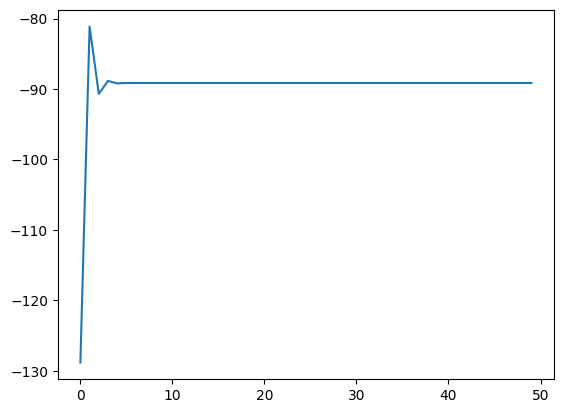

In [129]:
seasonal_test['0'].plot()

In [124]:
hybrid = seasonal_test['0'] + trend_test['0'] 

In [60]:
import numpy as np

In [59]:
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [61]:
mape(test_data['passenger'], hybrid)

nan

In [65]:
sum(test_data['passenger']==0)

0

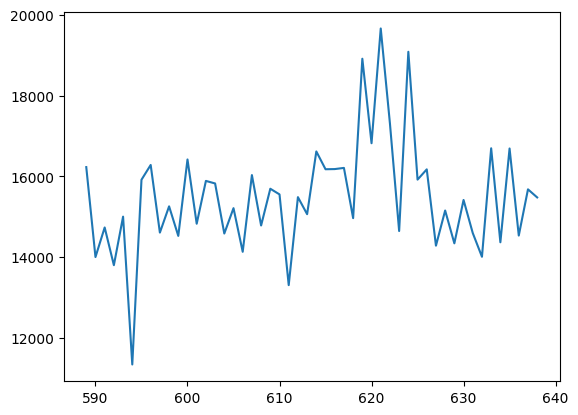

In [125]:
plt.plot(test_data['passenger'])

In [126]:
hasil_test = pd.DataFrame({
    "hybrid": hybrid,
    "actual": test_data['passenger'].reset_index(drop=True)
})

In [128]:
mape(hasil_test['actual'], hasil_test['hybrid'])

np.float64(13.260034076261066)

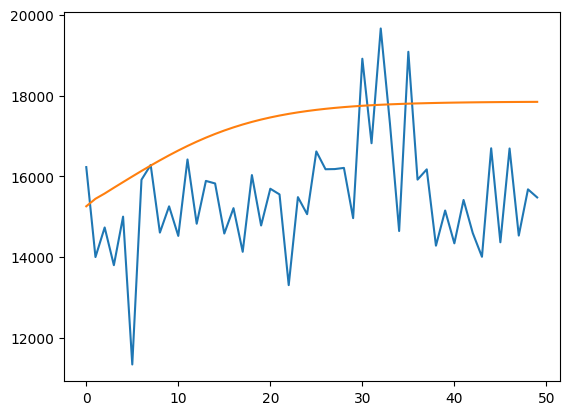

In [127]:
plt.plot(hasil_test['actual'])
plt.plot(hasil_test['hybrid'])

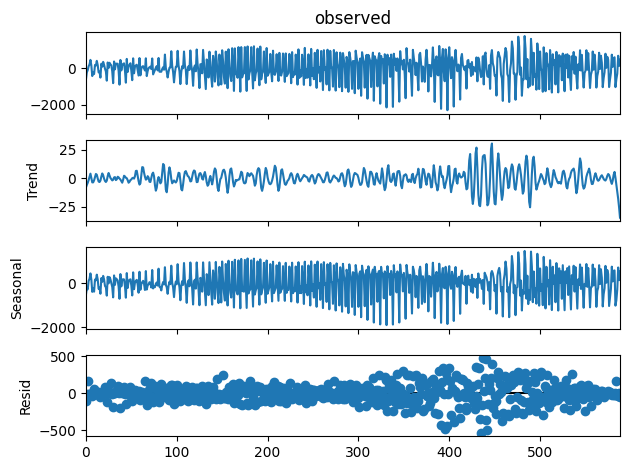

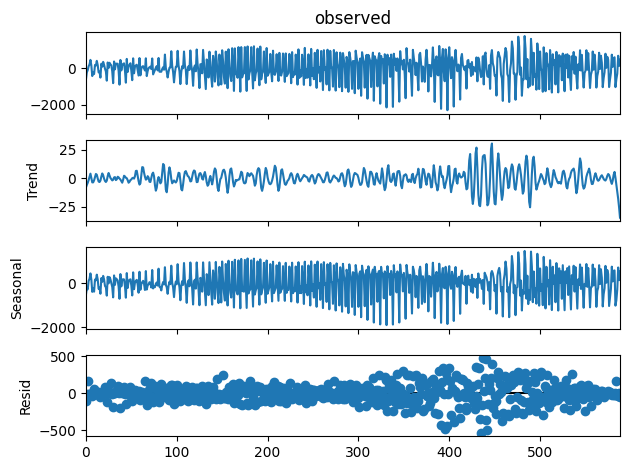

In [131]:
mstl_seasonal = MSTL(res.seasonal,periods=[7])
mstl_seasonal = mstl_seasonal.fit()
mstl_seasonal.plot()